In [2]:
#Importing the required lib.
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#Initializing the training and validation generators
train_path = 'DataSet/train'
val_path = 'DataSet/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
#Building the convolution network architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [5]:
#Tarining the Model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])
model_history = model.fit(
    train_generator,
    steps_per_epoch=28709 // 64,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=7178 // 64)

Epoch 1/10
448/448 [==============================] - 398s 860ms/step - loss: 1.7921 - accuracy: 0.2659 - val_loss: 1.6900 - val_accuracy: 0.3623
Epoch 2/10
448/448 [==============================] - 203s 454ms/step - loss: 1.6236 - accuracy: 0.3703 - val_loss: 1.5462 - val_accuracy: 0.4153
Epoch 3/10
448/448 [==============================] - 198s 442ms/step - loss: 1.5349 - accuracy: 0.4124 - val_loss: 1.4852 - val_accuracy: 0.4318
Epoch 4/10
448/448 [==============================] - 189s 422ms/step - loss: 1.4639 - accuracy: 0.4382 - val_loss: 1.4080 - val_accuracy: 0.4662
Epoch 5/10
448/448 [==============================] - 202s 451ms/step - loss: 1.4076 - accuracy: 0.4612 - val_loss: 1.3661 - val_accuracy: 0.4774
Epoch 6/10
448/448 [==============================] - 229s 511ms/step - loss: 1.3558 - accuracy: 0.4826 - val_loss: 1.3150 - val_accuracy: 0.5033
Epoch 7/10
448/448 [==============================] - 202s 451ms/step - loss: 1.3112 - accuracy: 0.5024 - val_loss: 1.2894 -

In [7]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


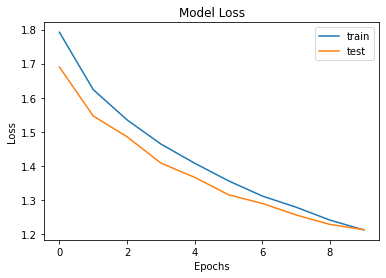

In [8]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()

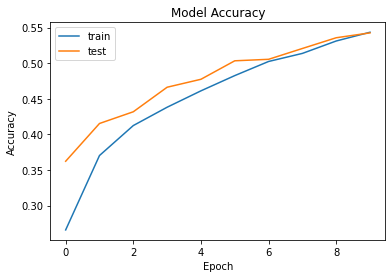

In [9]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
#Saving the Model Weight
model.save_weights('model.h5')